#Skin Cancer MNIST: HAM10000

a large collection of multi-source dermatoscopic images of pigmented lesions

https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000

흑색종이란?

흑색종은 색소를 생성하는 피부 세포(멜라닌 세포)에서 시작되는 피부암입니다.

흑색종 진단방법

흑색종의 ABCDE

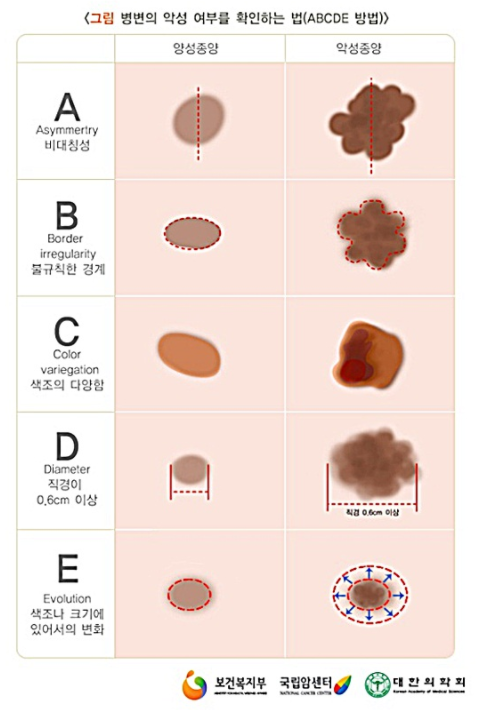

피부암 중 하나인 악성 흑생종의 종류에는 선단 흑자성 흑색종, 결절성 흑색종, 표재 확장성 흑생종이 있습니다.

출처: http://cancer-strategy.com/2435?cat=2


표피 깊은 곳에 있는 멜라닌 세포는 검은 색소인 멜라닌을 만들고 주위 다른 표피 세포로 멜라닌 과립을 전달하여 분포하게 되는데, 멜라닌은 자외선을 흡수하기 때문에 자외선에 의한 피부세포의 DNA 변이와 다른 유해한 영향을 막아주는 중요한 역할을 한다. 문제는 처음에 대수롭지 않게 생각했던 피부 흑색종이 시간이 경과하면서 암덩어리로부터 일부 암세포가 떨어져 나와 림프관 또는 혈관을 통해서 뼈, 간, 폐 등으로 전이하며, 암 덩어리를 외과적으로 절제하더라도 재발이 잦기 때문에 치료가 까다롭다는 것이다.

서양인들에게는 보통 표재확산 흑색종이 많이 나타나며, 아시아인에게 꾸준히 증가하는 흑색종은 말단흑색점 흑색종이다.

일반적으로 흑색종 진단을 위한 비침습적 방법으로는 피부표면현미경을 이용한다. 피부표면현미경은 피부 표면에서의 빛의 반사를 막고 대부분의 빛을 진피 상부까지 침투시킴으로써 피부의 진피 표피 경계부 및 상부진피를 관찰할 수 있는 피부진단 장비로서 조직 검사를 하지 않아도 병변의 색조 및 형태 파악을 통해 진단에 이용할 수 있다.

출처: 
말단흑색점흑색종 판별을 위한 전처리 과정 - Yonsei University

https://ir.ymlib.yonsei.ac.kr 

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
!unzip -qq '/content/drive/MyDrive/DATA/archive.zip'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Data Description
--

**HAM1000_images_part_1, 2**


skin lesions is hampered by the small size and lack of diversity of available datsets of dermatoscopice images.

collected dermatoscopice images from different populations, acquired and stored by different modalities. the final dataset consists of 10015 dermatoscopic images which can serve trainig set for academic machine learning purposes.

- Q. why HAM10000_images_part files exist two files?

- A. Due to upload size limitations, images are stored in two files

데이터 불러오기

In [ ]:
import os

In [ ]:
print("HAM10000_images_part_1의 이미지 개수:", len(os.listdir('/content/HAM10000_images_part_1')))
print("HAM10000_images_part_2의 이미지 개수:", len(os.listdir('/content/HAM10000_images_part_2')))

HAM10000_images_part_1의 이미지 개수: 5000
HAM10000_images_part_2의 이미지 개수: 5015


In [ ]:
ham=pd.read_csv("/content/HAM10000_metadata.csv")
hmnist_2828_L=pd.read_csv("/content/hmnist_28_28_L.csv")
hmnist_2828_RGB=pd.read_csv("/content/hmnist_28_28_RGB.csv")
hmnist_88_L=pd.read_csv("/content/hmnist_8_8_L.csv")
hmnist_88_RGB=pd.read_csv("/content/hmnist_8_8_RGB.csv")

데이터 살펴보기
--

In [ ]:
ham.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [ ]:
hmnist_2828_L.head(1)

pixel0000  pixel0001  pixel0002  ...  pixel0782  pixel0783  label
0        169        171        170  ...        159        165      2

[1 rows x 785 columns]

In [ ]:
hmnist_2828_RGB.head(1)

pixel0000  pixel0001  pixel0002  ...  pixel2350  pixel2351  label
0        192        153        193  ...        154        177      2

[1 rows x 2353 columns]

In [ ]:
hmnist_88_L.head(1)

pixel0000  pixel0001  pixel0002  ...  pixel0062  pixel0063  label
0        172        182        191  ...        171        157      2

[1 rows x 65 columns]

In [ ]:
hmnist_88_RGB.head(1)

pixel0000  pixel0001  pixel0002  ...  pixel0190  pixel0191  label
0        199        156        188  ...        143        167      2

[1 rows x 193 columns]

데이터 프레임 크기 확인

In [ ]:
print(ham.shape)
print(hmnist_2828_L.shape)
print(hmnist_2828_RGB.shape)
print(hmnist_88_L.shape)
print(hmnist_88_RGB.shape)

(10015, 7)
(10015, 785)
(10015, 2353)
(10015, 65)
(10015, 193)


결측치 확인

In [ ]:
print(ham.isna().sum())
print(hmnist_2828_L.isna().sum())
print(hmnist_2828_RGB.isna().sum())
print(hmnist_88_L.isna().sum())
print(hmnist_88_RGB.isna().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64
pixel0000    0
pixel0001    0
pixel0002    0
pixel0003    0
pixel0004    0
            ..
pixel0780    0
pixel0781    0
pixel0782    0
pixel0783    0
label        0
Length: 785, dtype: int64
pixel0000    0
pixel0001    0
pixel0002    0
pixel0003    0
pixel0004    0
            ..
pixel2348    0
pixel2349    0
pixel2350    0
pixel2351    0
label        0
Length: 2353, dtype: int64
pixel0000    0
pixel0001    0
pixel0002    0
pixel0003    0
pixel0004    0
            ..
pixel0060    0
pixel0061    0
pixel0062    0
pixel0063    0
label        0
Length: 65, dtype: int64
pixel0000    0
pixel0001    0
pixel0002    0
pixel0003    0
pixel0004    0
            ..
pixel0188    0
pixel0189    0
pixel0190    0
pixel0191    0
label        0
Length: 193, dtype: int64


- HAM10000_metadata 데이터프레임에 age에서 결측치 확인

#EDA

HAM10000_metadata
--

In [ ]:
ham

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

[Text(0.5, 1.0, 'dx')]

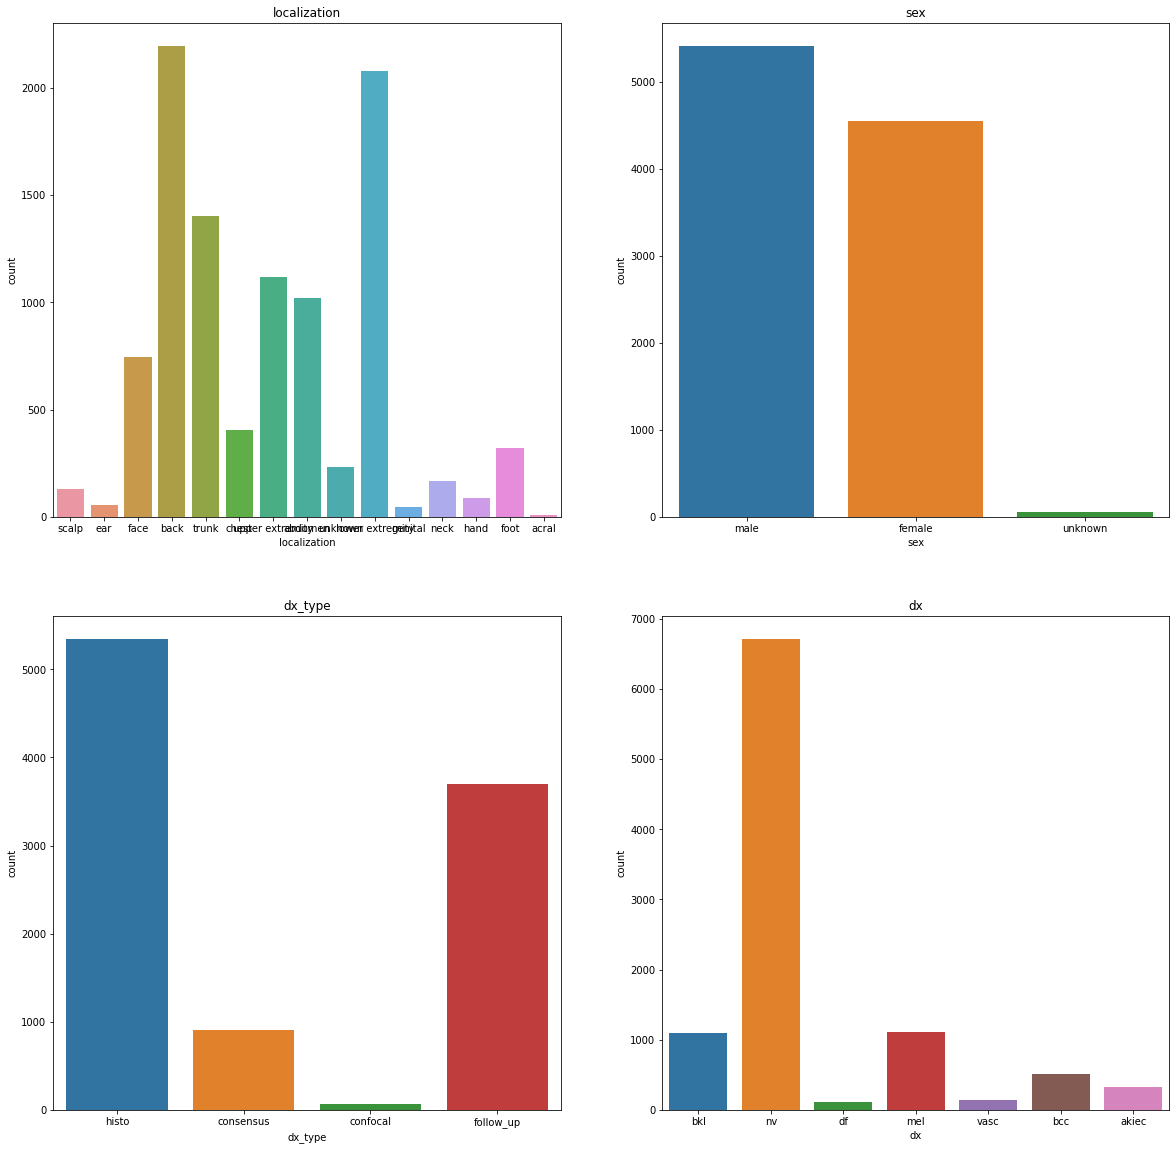

In [ ]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(20,20)

sns.countplot(ham.localization, ax=ax1)
sns.countplot(ham.sex, ax=ax2)
sns.countplot(ham.dx_type, ax=ax3)
sns.countplot(ham.dx, ax=ax4)
sns.set_style('darkgrid')
ax1.set(title="localization")
ax2.set(title="sex")
ax3.set(title="dx_type")
ax4.set(title="dx")

- dx를 살펴보면 nv 사진의 개수는 많으나, df 사진은 이에 비해 현저히 적은 것을 확인할 수 있다.

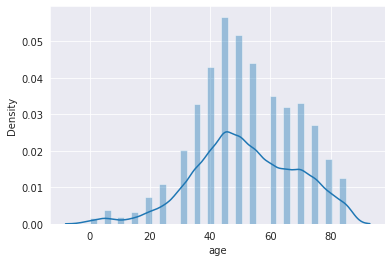

In [ ]:
sns.distplot(ham.age)

- 연령대는 40대가 가장 많은 것을 볼 수 있다.

In [ ]:
ham.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

In [ ]:
ham['dx'].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

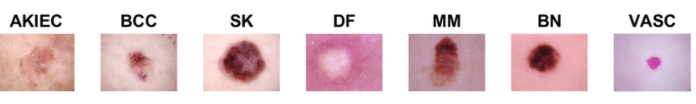

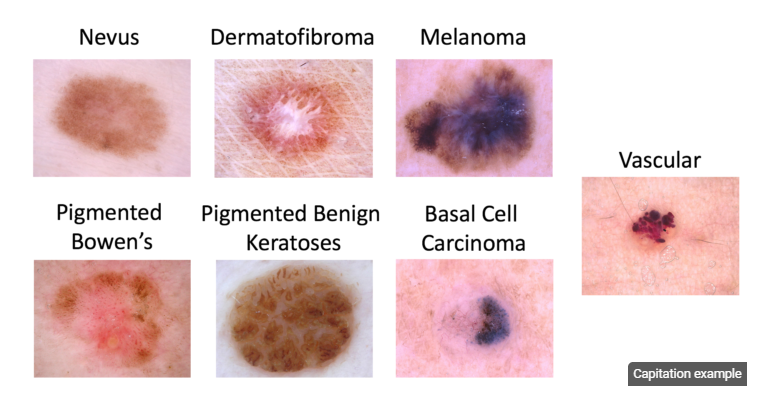

Some skin lesion examples: Actinic Keratosis Intraepithelial Carcinoma (AKIEC), Basal Cell Carcinoma (BCC), Seborrheic Keratosis (SK), Dermatofibroma (DF), Malignant Melanoma (MM), Benign Nevi (BN), Vascular lesion (VASC) from left to right, respectively. Images were adapted from the International Skin Imaging Collaboration (ISIC) archive with CC-0 licensing.

출처: https://www.researchgate.net/figure/Some-skin-lesion-examples-Actinic-Keratosis-Intraepithelial-Carcinoma-AKIEC-Basal_fig2_340031990


**Skin Cancer MNIST: HAM10000**

lesions: Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec), basal cell carcinoma (bcc), benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl), dermatofibroma (df), melanoma (mel), melanocytic nevi (nv) and vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc).

In [ ]:
ham['dx_type'].unique()

array(['histo', 'consensus', 'confocal', 'follow_up'], dtype=object)

More than 50% of lesions are confirmed through histopathology (histo), the ground truth for the rest of the cases is either follow-up examination (followup), expert consensus (consensus), or confirmation by in-vivo confocal microscopy (confocal). 

In [ ]:
ham['age'].unique()

array([80., 75., 60., 70., 55., 85., 65., 40., 50., 45., 35.,  0., 30.,
       nan,  5., 25., 20., 10., 15.])

In [ ]:
ham['sex'].unique()

array(['male', 'female', 'unknown'], dtype=object)

In [ ]:
ham['localization'].unique()

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

scalp: 머리가죽

ear: 귀

face: 얼굴

back: 등

trunk: 트렁크

chest: 가슴

upper extremity: 팔

abadomen: 복부

unknown: 모름

lower extremity: 다리

genital: 생식기

neck: 목

hand: 손

foot: 발

acral: 말단

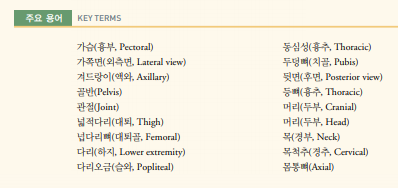

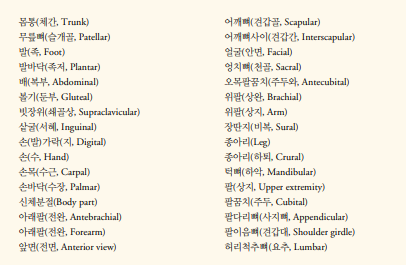

- 출처: 인체의 구성 

- https://s3-ap-southeast-1.amazonaws.com/elsevierasia/media/blfa_files/9788994961026.pdf

결측치 처리
--

In [ ]:
ham.loc[ham['age'].isna()]

lesion_id      image_id   dx    dx_type  age      sex     localization
968   HAM_0001186  ISIC_0033391  bkl  consensus  NaN  unknown          unknown
969   HAM_0002660  ISIC_0033750  bkl  consensus  NaN  unknown          unknown
970   HAM_0000372  ISIC_0033685  bkl  consensus  NaN  unknown          unknown
971   HAM_0000948  ISIC_0033631  bkl  consensus  NaN  unknown          unknown
972   HAM_0000983  ISIC_0033490  bkl  consensus  NaN  unknown          unknown
973   HAM_0007281  ISIC_0034283  bkl  consensus  NaN  unknown          unknown
974   HAM_0001561  ISIC_0032740  bkl  consensus  NaN  unknown          unknown
975   HAM_0000825  ISIC_0034186  bkl  consensus  NaN  unknown          unknown
977   HAM_0006074  ISIC_0034252  bkl  consensus  NaN  unknown          unknown
978   HAM_0006074  ISIC_0033829  bkl  consensus  NaN  unknown          unknown
1886  HAM_0000169  ISIC_0032960  mel      histo  NaN     male             face
1887  HAM_0000169  ISIC_0033708  mel      histo  NaN     male             face
7558  HAM_0007278  ISIC_0025009   nv      histo  NaN   female            chest
7961  HAM_0002417  ISIC_0033442   nv      histo  NaN     male  upper extremity
7962  HAM_0002417  ISIC_0032943   nv      histo  NaN     male  upper extremity
8410  HAM_0006706  ISIC_0031725   nv      histo  NaN   female          abdomen
8411  HAM_0004924  ISIC_0027040   nv      histo  NaN   female            trunk
8555  HAM_0007278  ISIC_0032300   nv      histo  NaN   female            chest
9386  HAM_0000698  ISIC_0031668   nv  consensus  NaN     male             foot
9387  HAM_0000698  ISIC_0027431   nv  consensus  NaN     male             foot
9593  HAM_0006766  ISIC_0033374   nv  consensus  NaN  unknown          unknown
9594  HAM_0004237  ISIC_0033877   nv  consensus  NaN  unknown          unknown
9595  HAM_0007460  ISIC_0032578   nv  consensus  NaN  unknown          unknown
9596  HAM_0000822  ISIC_0033841   nv  consensus  NaN  unknown          unknown
9597  HAM_0006644  ISIC_0033882   nv  consensus  NaN  unknown          unknown
9598  HAM_0004120  ISIC_0034266   nv  consensus  NaN  unknown          unknown
9599  HAM_0005257  ISIC_0033751   nv  consensus  NaN  unknown          unknown
9600  HAM_0001619  ISIC_0033065   nv  consensus  NaN  unknown          unknown
9601  HAM_0001147  ISIC_0033375   nv  consensus  NaN  unknown          unknown
9602  HAM_0004508  ISIC_0033628   nv  consensus  NaN  unknown          unknown
9603  HAM_0002037  ISIC_0033733   nv  consensus  NaN  unknown          unknown
9604  HAM_0007191  ISIC_0032738   nv  consensus  NaN  unknown          unknown
9605  HAM_0001000  ISIC_0033353   nv  consensus  NaN  unknown          unknown
9606  HAM_0000627  ISIC_0034019   nv  consensus  NaN  unknown          unknown
9607  HAM_0002164  ISIC_0032852   nv  consensus  NaN  unknown          unknown
9608  HAM_0000421  ISIC_0034080   nv  consensus  NaN  unknown          unknown
9609  HAM_0003561  ISIC_0034154   nv  consensus  NaN  unknown          unknown
9610  HAM_0004430  ISIC_0032789   nv  consensus  NaN  unknown          unknown
9611  HAM_0007301  ISIC_0033417   nv  consensus  NaN  unknown          unknown
9612  HAM_0003935  ISIC_0033782   nv  consensus  NaN  unknown          unknown
9613  HAM_0001118  ISIC_0033332   nv  consensus  NaN  unknown          unknown
9614  HAM_0007172  ISIC_0034130   nv  consensus  NaN  unknown          unknown
9615  HAM_0003696  ISIC_0032945   nv  consensus  NaN  unknown          unknown
9616  HAM_0005439  ISIC_0033597   nv  consensus  NaN  unknown          unknown
9617  HAM_0002282  ISIC_0034045   nv  consensus  NaN  unknown          unknown
9618  HAM_0001139  ISIC_0033028   nv  consensus  NaN  unknown          unknown
9619  HAM_0003998  ISIC_0033809   nv  consensus  NaN  unknown          unknown
9620  HAM_0003034  ISIC_0033187   nv  consensus  NaN  unknown          unknown
9621  HAM_0001366  ISIC_0032814   nv  consensus  NaN  unknown          unknown
9622  HAM_0004670  ISIC_0033190   nv  consensus  NaN  unkn

결측치를 살펴본 결과, dx_type이 대부분 consensus인 것을 확인할 수 있었습니다.

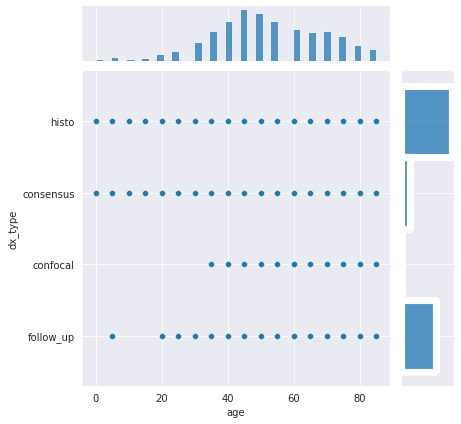

In [ ]:
sns.jointplot(x=ham['age'], y=ham['dx_type'])

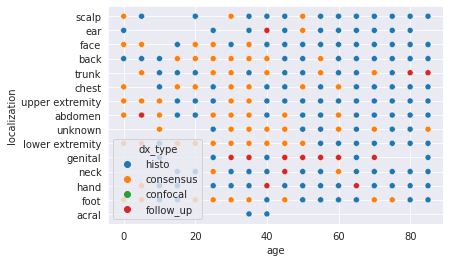

In [ ]:
sns.scatterplot(data=ham, x="age", y="localization", hue="dx_type")

- consensus는 타 dx_type에 비해 그 비율도 적고, 연령대로 보았을 때, 나이가 어린 층에서 많이 나타났는데, age의 결측치들은 대부분 consensus라는 dx_type에서 나타났다. 따라서, age의 전체 평균값이 아닌 consensus에서의 age의 평균값으로 age를 대체하도록 한다.

In [ ]:
ham.loc[ham['dx_type']=='consensus'].age.mean()

47.96600234466589

In [ ]:
ham['age']=ham['age'].fillna(47)

In [ ]:
ham.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

unknown은 어떻게  처리해야 할까??
--

In [ ]:
ham['sex'].unique()

array(['male', 'female', 'unknown'], dtype=object)

In [ ]:
ham['localization'].unique()

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

In [ ]:
ham.loc[ham['sex']=='unknown']

lesion_id      image_id   dx    dx_type   age      sex localization
968   HAM_0001186  ISIC_0033391  bkl  consensus  47.0  unknown      unknown
969   HAM_0002660  ISIC_0033750  bkl  consensus  47.0  unknown      unknown
970   HAM_0000372  ISIC_0033685  bkl  consensus  47.0  unknown      unknown
971   HAM_0000948  ISIC_0033631  bkl  consensus  47.0  unknown      unknown
972   HAM_0000983  ISIC_0033490  bkl  consensus  47.0  unknown      unknown
973   HAM_0007281  ISIC_0034283  bkl  consensus  47.0  unknown      unknown
974   HAM_0001561  ISIC_0032740  bkl  consensus  47.0  unknown      unknown
975   HAM_0000825  ISIC_0034186  bkl  consensus  47.0  unknown      unknown
977   HAM_0006074  ISIC_0034252  bkl  consensus  47.0  unknown      unknown
978   HAM_0006074  ISIC_0033829  bkl  consensus  47.0  unknown      unknown
7315  HAM_0005942  ISIC_0032679   nv      histo  60.0  unknown         foot
7316  HAM_0005942  ISIC_0032529   nv      histo  60.0  unknown         foot
7317  HAM_0005942  ISIC_0033119   nv      histo  60.0  unknown         foot
7413  HAM_0003352  ISIC_0032599   nv      histo  35.0  unknown        trunk
7414  HAM_0003352  ISIC_0033472   nv      histo  35.0  unknown        trunk
7415  HAM_0003352  ISIC_0032667   nv      histo  35.0  unknown        trunk
8016  HAM_0004076  ISIC_0032966   nv      histo   0.0  unknown         back
8017  HAM_0004076  ISIC_0033864   nv      histo   0.0  unknown         back
8023  HAM_0003649  ISIC_0032946   nv      histo  45.0  unknown      abdomen
8024  HAM_0003649  ISIC_0033153   nv      histo  45.0  unknown      abdomen
9593  HAM_0006766  ISIC_0033374   nv  consensus  47.0  unknown      unknown
9594  HAM_0004237  ISIC_0033877   nv  consensus  47.0  unknown      unknown
9595  HAM_0007460  ISIC_0032578   nv  consensus  47.0  unknown      unknown
9596  HAM_0000822  ISIC_0033841   nv  consensus  47.0  unknown      unknown
9597  HAM_0006644  ISIC_0033882   nv  consensus  47.0  unknown      unknown
9598  HAM_0004120  ISIC_0034266   nv  consensus  47.0  unknown      unknown
9599  HAM_0005257  ISIC_0033751   nv  consensus  47.0  unknown      unknown
9600  HAM_0001619  ISIC_0033065   nv  consensus  47.0  unknown      unknown
9601  HAM_0001147  ISIC_0033375   nv  consensus  47.0  unknown      unknown
9602  HAM_0004508  ISIC_0033628   nv  consensus  47.0  unknown      unknown
9603  HAM_0002037  ISIC_0033733   nv  consensus  47.0  unknown      unknown
9604  HAM_0007191  ISIC_0032738   nv  consensus  47.0  unknown      unknown
9605  HAM_0001000  ISIC_0033353   nv  consensus  47.0  unknown      unknown
9606  HAM_0000627  ISIC_0034019   nv  consensus  47.0  unknown      unknown
9607  HAM_0002164  ISIC_0032852   nv  consensus  47.0  unknown      unknown
9608  HAM_0000421  ISIC_0034080   nv  consensus  47.0  unknown      unknown
9609  HAM_0003561  ISIC_0034154   nv  consensus  47.0  unknown      unknown
9610  HAM_0004430  ISIC_0032789   nv  consensus  47.0  unknown      unknown
9611  HAM_0007301  ISIC_0033417   nv  consensus  47.0  unknown      unknown
9612  HAM_0003935  ISIC_0033782   nv  consensus  47.0  unknown      unknown
9613  HAM_0001118  ISIC_0033332   nv  consensus  47.0  unknown      unknown
9614  HAM_0007172  ISIC_0034130   nv  consensus  47.0  unknown      unknown
9615  HAM_0003696  ISIC_0032945   nv  consensus  47.0  unknown      unknown
9616  HAM_0005439  ISIC_0033597   nv  consensus  47.0  unknown      unknown
9617  HAM_0002282  ISIC_0034045   nv  consensus  47.0  unknown      unknown
9618  HAM_0001139  ISIC_0033028   nv  consensus  47.0  unknown      unknown
9619  HAM_0003998  ISIC_0033809   nv  consensus  47.0  unknown      unknown
9620  HAM_0003034  ISIC_0033187   nv  consensus  47.0  unknown      unknown
9621  HAM_0001366  ISIC_0032814   nv  consensus  47.0  unknown      unknown
9622  HAM_0004670  ISIC_0033190   nv  consensus  47.0  unknown      unknown
9623  HAM_0003017  ISIC_0033535   nv  consensus  47.0  unknown      unknown
9624  HAM_0005156  ISIC_0033330   nv  consensus  47.0  u

In [ ]:
ham.loc[ham['localization']=='unknown']

lesion_id      image_id   dx    dx_type   age     sex localization
50    HAM_0003670  ISIC_0030105  bkl      histo  80.0  female      unknown
56    HAM_0003569  ISIC_0027960  bkl      histo  75.0    male      unknown
57    HAM_0003569  ISIC_0026955  bkl      histo  75.0    male      unknown
140   HAM_0002774  ISIC_0029683  bkl      histo  65.0    male      unknown
461   HAM_0005527  ISIC_0031819  bkl      histo  50.0    male      unknown
...           ...           ...  ...        ...   ...     ...          ...
9636  HAM_0004370  ISIC_0024757   nv  consensus  10.0    male      unknown
9639  HAM_0000057  ISIC_0026391   nv  consensus  30.0    male      unknown
9640  HAM_0000057  ISIC_0025122   nv  consensus  30.0    male      unknown
9663  HAM_0001633  ISIC_0028618   nv  consensus  70.0    male      unknown
9664  HAM_0001633  ISIC_0031488   nv  consensus  70.0    male      unknown

[234 rows x 7 columns]

- unknown은 일단 넘기기로 한다.

In [ ]:
ham_2=ham[['dx', 'dx_type', 'age', 'sex', 'localization']]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [ ]:
ham_2['dx']=le.fit_transform(ham_2['dx'])
ham_2['dx_type']=le.fit_transform(ham_2['dx_type'])
ham_2['sex']=le.fit_transform(ham_2['sex'])
ham_2['localization']=le.fit_transform(ham_2['localization'])

In [ ]:
ham_2.head(2)

dx  dx_type   age  sex  localization
0   2        3  80.0    1            11
1   2        3  80.0    1            11

In [ ]:
import random
def random_color():
  color_map = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r',
               'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r',
               'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r',
               'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r',
               'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r',
               'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r',
               'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r',
               'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
               'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r',
               'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma']
  color = random.choice(color_map)
  print(color)
  return color

BuPu


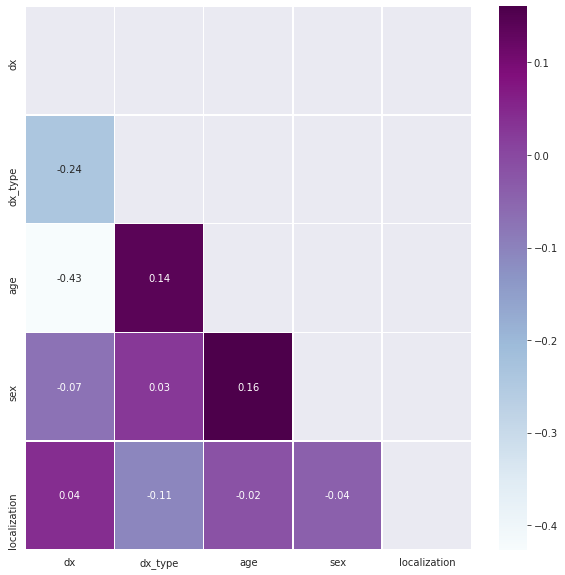

In [ ]:
plt.figure(figsize=(10,10))
mask = np.zeros_like(ham_2.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=ham_2.corr(), mask=mask, annot=True, fmt ='.2f', linewidths=.5, cmap=random_color())
plt.show()

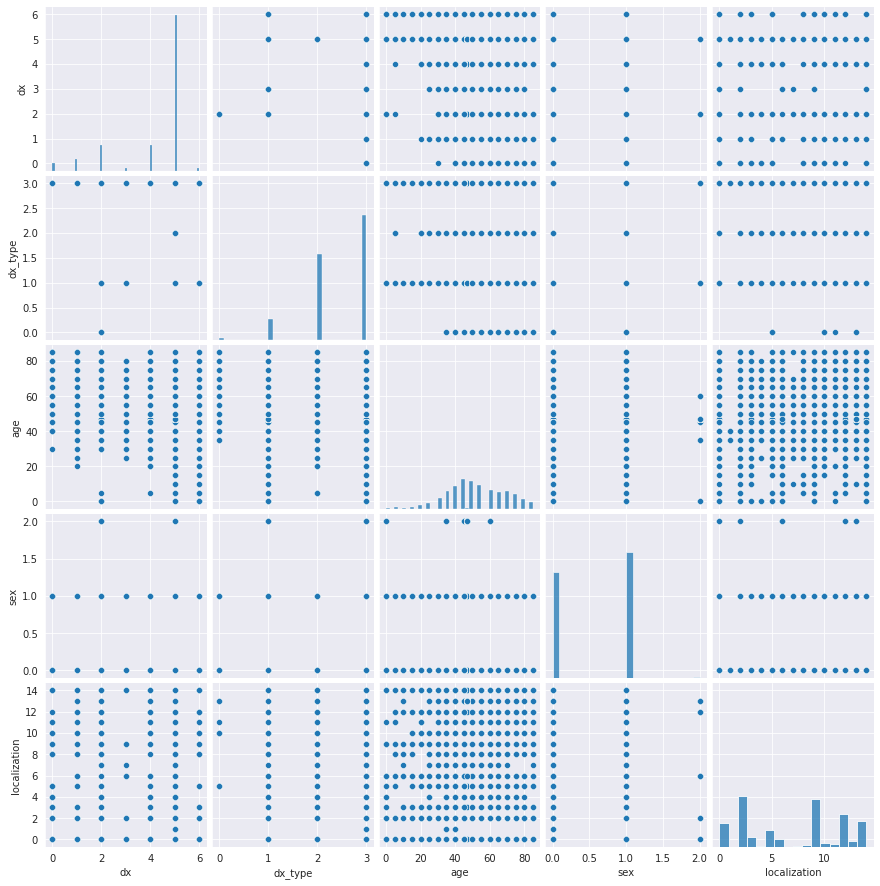

In [ ]:
sns.pairplot(ham_2)

Label Check
--

In [ ]:
hmnist_2828_RGB['label'].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [ ]:
hmnist_2828_L['label'].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [ ]:
hmnist_88_RGB['label'].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [ ]:
hmnist_88_L['label'].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [ ]:
ham['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

#이미지 살펴보기


**Skin Cancer MNIST: HAM10000**

lesions: Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec), basal cell carcinoma (bcc), benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl), dermatofibroma (df), melanoma (mel), melanocytic nevi (nv) and vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc).

In [ ]:
import IPython.display as display
from PIL import Image
from google.colab.patches import cv2_imshow
from matplotlib.pyplot import imshow

melanocytic nevi (nv) 6705장
--

In [ ]:
ham.loc[ham['dx']=='nv'].head(3)

lesion_id      image_id  dx    dx_type   age     sex     localization
64    HAM_0001751  ISIC_0024698  nv  consensus  70.0    male             face
1210  HAM_0000559  ISIC_0024693  nv  follow_up  45.0  female  upper extremity
2976  HAM_0004932  ISIC_0032212  nv  follow_up  45.0  female             foot

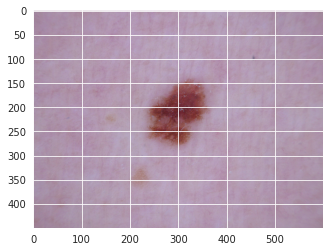

In [ ]:
img_1=Image.open('/content/HAM10000_images_part_1/ISIC_0024698.jpg')
imshow(np.asarray(img_1))

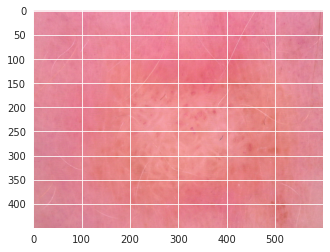

In [ ]:
img_2=Image.open('/content/HAM10000_images_part_1/ISIC_0024693.jpg')
imshow(np.asarray(img_2))

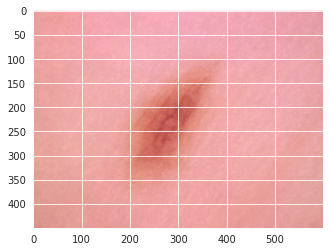

In [ ]:
img_3=Image.open('/content/HAM10000_images_part_2/ISIC_0032212.jpg')
imshow(np.asarray(img_3))

melanoma (mel) 1113장
--

In [ ]:
ham.loc[ham['dx']=='mel'].head(3)

lesion_id      image_id   dx dx_type   age     sex     localization
1211  HAM_0000871  ISIC_0025964  mel   histo  40.0  female            chest
1212  HAM_0000871  ISIC_0030623  mel   histo  40.0  female            chest
1213  HAM_0000040  ISIC_0027190  mel   histo  80.0    male  upper extremity

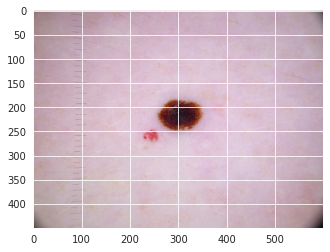

In [ ]:
img_1=Image.open('/content/HAM10000_images_part_1/ISIC_0025964.jpg')
imshow(np.asarray(img_1))

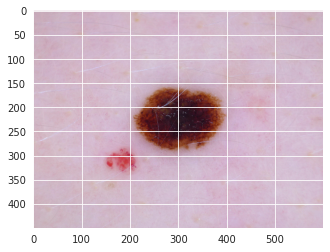

In [ ]:
img_2=Image.open('/content/HAM10000_images_part_2/ISIC_0030623.jpg')
imshow(np.asarray(img_2))

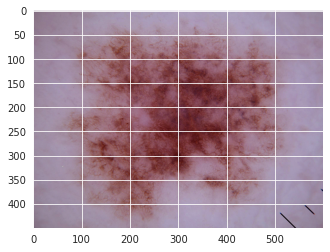

In [ ]:
img_3=Image.open('/content/HAM10000_images_part_1/ISIC_0027190.jpg')
imshow(np.asarray(img_3))

benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl) 1099장
--

In [ ]:
ham.loc[ham['dx']=='bkl'].head(3)

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp

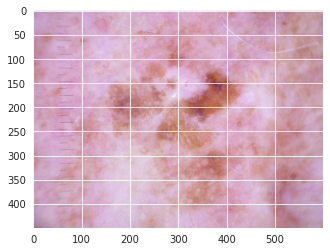

In [ ]:
img_=Image.open('/content/HAM10000_images_part_1/ISIC_0027419.jpg')
imshow(np.asarray(img_))

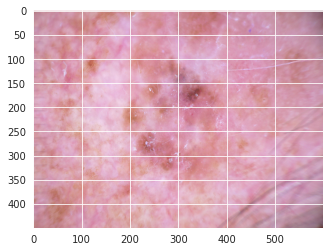

In [ ]:
img_=Image.open('/content/HAM10000_images_part_1/ISIC_0026769.jpg')
imshow(np.asarray(img_))

- 동일인물일 수도 있다는 생각을 했음.

In [ ]:
len(ham.loc[ham['dx']=='bkl'])

1099

In [ ]:
import random

for i in range(0,3):
  j=random.randrange(1,1099)
  print(j)
  i+=1

469
866
371


In [ ]:
print(ham.loc[ham['dx']=='bkl'].iloc[469, 1])
print(ham.loc[ham['dx']=='bkl'].iloc[866, 1])
print(ham.loc[ham['dx']=='bkl'].iloc[371, 1])

ISIC_0029525
ISIC_0029464
ISIC_0031593


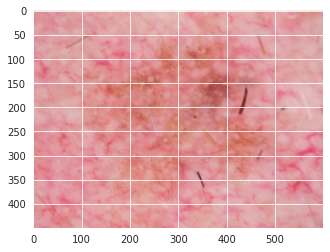

In [ ]:
img_=Image.open('/content/HAM10000_images_part_2/ISIC_0029525.jpg')
imshow(np.asarray(img_))

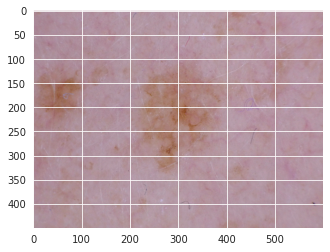

In [ ]:
img_=Image.open('/content/HAM10000_images_part_2/ISIC_0029464.jpg')
imshow(np.asarray(img_))

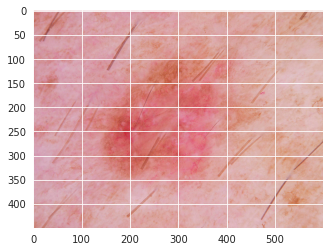

In [ ]:
img_=Image.open('/content/HAM10000_images_part_2/ISIC_0031593.jpg')
imshow(np.asarray(img_))

basal cell carcinoma (bcc) 514장
--

In [ ]:
len(ham.loc[ham['dx']=='bcc'])

514

In [ ]:
random.randrange(1,514)

266

In [ ]:
ham.loc[ham['dx']=='bcc'].iloc[266, 1]

'ISIC_0031712'

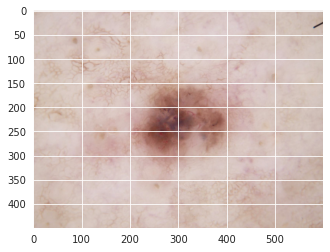

In [ ]:
img_=Image.open('/content/HAM10000_images_part_2/ISIC_0031712.jpg')
imshow(np.asarray(img_))

In [ ]:
j=random.randrange(1,514)
ham.loc[ham['dx']=='bcc'].iloc[j, 1]

'ISIC_0024448'

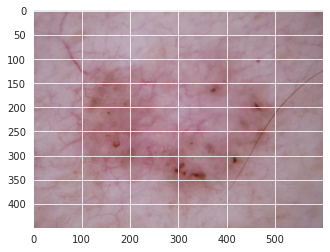

In [ ]:
img_=Image.open('/content/HAM10000_images_part_1/ISIC_0024448.jpg')
imshow(np.asarray(img_))

 Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec) 327장
--

In [ ]:
j=random.randrange(1,327)
ham.loc[ham['dx']=='akiec'].iloc[j, 1]

'ISIC_0029713'

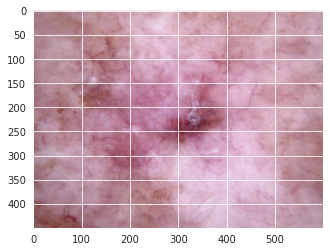

In [ ]:
img_=Image.open('/content/HAM10000_images_part_2/ISIC_0029713.jpg')
imshow(np.asarray(img_))

In [ ]:
j=random.randrange(1,327)
ham.loc[ham['dx']=='akiec'].iloc[j, 1]

'ISIC_0025948'

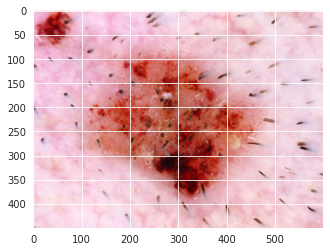

In [ ]:
img_=Image.open('/content/HAM10000_images_part_1/ISIC_0025948.jpg')
imshow(np.asarray(img_))

vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc) 142장
--

In [ ]:
j=random.randrange(1,142)
ham.loc[ham['dx']=='akiec'].iloc[j, 1]

'ISIC_0024707'

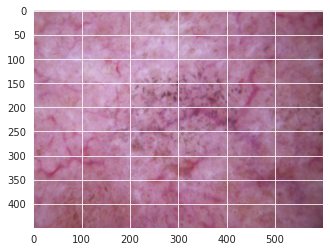

In [ ]:
img_=Image.open('/content/HAM10000_images_part_1/ISIC_0024707.jpg')
imshow(np.asarray(img_))

In [ ]:
j=random.randrange(1,142)
ham.loc[ham['dx']=='akiec'].iloc[j, 1]

'ISIC_0025825'

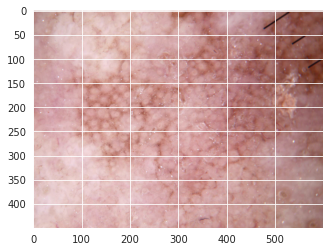

In [ ]:
img_=Image.open('/content/HAM10000_images_part_1/ISIC_0025825.jpg')
imshow(np.asarray(img_))

dermatofibroma (df) 115장
--

In [ ]:
for i in range(0,2):
  j=random.randrange(1,115)
  print(ham.loc[ham['dx']=='df'].iloc[j, 1])
  i+=1

ISIC_0026254
ISIC_0032642


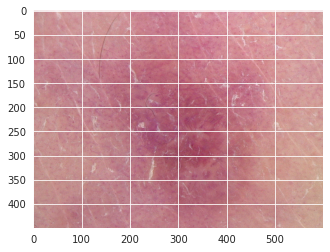

In [ ]:
img_=Image.open('/content/HAM10000_images_part_1/ISIC_0026254.jpg')
imshow(np.asarray(img_))

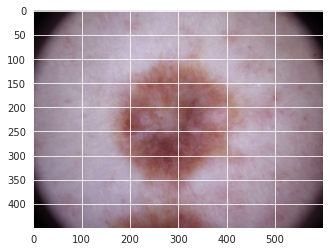

In [ ]:
img_=Image.open('/content/HAM10000_images_part_2/ISIC_0032642.jpg')
imshow(np.asarray(img_))

# 전처리하기

In [ ]:
ham

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

In [ ]:
df_ham=ham[['image_id','dx']]

In [ ]:
df_ham

image_id     dx
0      ISIC_0027419    bkl
1      ISIC_0025030    bkl
2      ISIC_0026769    bkl
3      ISIC_0025661    bkl
4      ISIC_0031633    bkl
...             ...    ...
10010  ISIC_0033084  akiec
10011  ISIC_0033550  akiec
10012  ISIC_0033536  akiec
10013  ISIC_0032854  akiec
10014  ISIC_0032258    mel

[10015 rows x 2 columns]

In [ ]:
hmnist_2828_RGB['label'].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [ ]:
ham['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [ ]:
df_ham

image_id     dx
0      ISIC_0027419    bkl
1      ISIC_0025030    bkl
2      ISIC_0026769    bkl
3      ISIC_0025661    bkl
4      ISIC_0031633    bkl
...             ...    ...
10010  ISIC_0033084  akiec
10011  ISIC_0033550  akiec
10012  ISIC_0033536  akiec
10013  ISIC_0032854  akiec
10014  ISIC_0032258    mel

[10015 rows x 2 columns]

HAM1000_images_part_1의 첫 번째 사진 이름은 ISIC_0024306.jpg으로 df_ham의 첫 번째 image_id와 다르다. 이에 따라 HAM1000_images_part_1, HAM1000_images_part_2의 사진과 dx를 mapping 해줄 필요가 있다. 

In [ ]:
df_ham=df_ham.sort_values('image_id', ascending=True)

In [ ]:
df_ham

image_id   dx
4349  ISIC_0024306   nv
4263  ISIC_0024307   nv
4217  ISIC_0024308   nv
3587  ISIC_0024309   nv
1451  ISIC_0024310  mel
...            ...  ...
1721  ISIC_0034316  mel
1888  ISIC_0034317  mel
121   ISIC_0034318  bkl
7440  ISIC_0034319   nv
7363  ISIC_0034320   nv

[10015 rows x 2 columns]

In [ ]:
df_ham=df_ham.reset_index()

In [ ]:
df_ham.head(2)

index      image_id  dx
0   4349  ISIC_0024306  nv
1   4263  ISIC_0024307  nv

In [ ]:
df_ham.drop('index', axis=1, inplace=True)

In [ ]:
df_ham.head(2)

image_id  dx
0  ISIC_0024306  nv
1  ISIC_0024307  nv

In [ ]:
error_list=[]

for i in range(0,10015):
  if df_ham.iloc[i, 1]=='nv':
    df_ham.iloc[i, 1]=4
  elif df_ham.iloc[i, 1]=='mel':
    df_ham.iloc[i, 1]=6
  elif df_ham.iloc[i, 1]=='bkl':
    df_ham.iloc[i, 1]=2
  elif df_ham.iloc[i, 1]=='bcc':
    df_ham.iloc[i, 1]=1
  elif df_ham.iloc[i, 1]=='akiec':
    df_ham.iloc[i, 1]=0
  elif df_ham.iloc[i, 1]=='vasc':
    df_ham.iloc[i, 1]=5
  elif df_ham.iloc[i, 1]=='df':
    df_ham.iloc[i, 1]=3
  else:
    error_list.append(i)

In [ ]:
df_ham

image_id dx
0      ISIC_0024306  4
1      ISIC_0024307  4
2      ISIC_0024308  4
3      ISIC_0024309  4
4      ISIC_0024310  6
...             ... ..
10010  ISIC_0034316  6
10011  ISIC_0034317  6
10012  ISIC_0034318  2
10013  ISIC_0034319  4
10014  ISIC_0034320  4

[10015 rows x 2 columns]

In [ ]:
len(df_ham.dx.unique())

7

In [ ]:
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
# dx를 one-hot encoding 해줍니다.
y=to_categorical(df_ham['dx'], num_classes=7)

In [ ]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
df_ham['path']=0

In [ ]:
df_ham

image_id dx  path
0      ISIC_0024306  4     0
1      ISIC_0024307  4     0
2      ISIC_0024308  4     0
3      ISIC_0024309  4     0
4      ISIC_0024310  6     0
...             ... ..   ...
10010  ISIC_0034316  6     0
10011  ISIC_0034317  6     0
10012  ISIC_0034318  2     0
10013  ISIC_0034319  4     0
10014  ISIC_0034320  4     0

[10015 rows x 3 columns]

In [ ]:
for i in range(0,5000):
  image_name=df_ham.iloc[i, 0]
  df_ham.iloc[i, 2]=f"/content/HAM10000_images_part_1/{image_name}.jpg"

In [ ]:
for i in range(5000,10015):
  image_name=df_ham.iloc[i, 0]
  df_ham.iloc[i, 2]=f"/content/HAM10000_images_part_2/{image_name}.jpg"

In [ ]:
df_ham

image_id dx                                              path
0      ISIC_0024306  4  /content/HAM10000_images_part_1/ISIC_0024306.jpg
1      ISIC_0024307  4  /content/HAM10000_images_part_1/ISIC_0024307.jpg
2      ISIC_0024308  4  /content/HAM10000_images_part_1/ISIC_0024308.jpg
3      ISIC_0024309  4  /content/HAM10000_images_part_1/ISIC_0024309.jpg
4      ISIC_0024310  6  /content/HAM10000_images_part_1/ISIC_0024310.jpg
...             ... ..                                               ...
10010  ISIC_0034316  6  /content/HAM10000_images_part_2/ISIC_0034316.jpg
10011  ISIC_0034317  6  /content/HAM10000_images_part_2/ISIC_0034317.jpg
10012  ISIC_0034318  2  /content/HAM10000_images_part_2/ISIC_0034318.jpg
10013  ISIC_0034319  4  /content/HAM10000_images_part_2/ISIC_0034319.jpg
10014  ISIC_0034320  4  /content/HAM10000_images_part_2/ISIC_0034320.jpg

[10015 rows x 3 columns]

In [ ]:
len(df_ham['path'].unique())

10015

In [ ]:
df_ham.loc[df_ham['path']==0]

Empty DataFrame
Columns: [image_id, dx, path]
Index: []

- 경로가 다 제대로 들어왔음

In [ ]:
df_ham['image']=0

In [ ]:
df_ham['image']=df_ham['path'].map(lambda x:np.asarray(Image.open(x).resize((256,192))))

We will now resize image to reduce training time, as the files are way too big to process raw. They are 600 x 450, so we will resize with appropriate scale of 4:3 to 256 x 192. 256 was chosen as base from ImageNet

- https://www.kaggle.com/camlemessurier/skin-cancer-classifier-data-process

In [ ]:
df_ham

image_id  ...                                              image
0      ISIC_0024306  ...  [[[224, 129, 128], [227, 131, 131], [228, 130,...
1      ISIC_0024307  ...  [[[215, 123, 133], [216, 122, 133], [218, 122,...
2      ISIC_0024308  ...  [[[246, 172, 181], [246, 174, 182], [246, 173,...
3      ISIC_0024309  ...  [[[207, 119, 134], [205, 119, 132], [208, 122,...
4      ISIC_0024310  ...  [[[71, 34, 37], [71, 33, 40], [72, 32, 38], [7...
...             ...  ...                                                ...
10010  ISIC_0034316  ...  [[[59, 34, 40], [62, 36, 42], [67, 38, 42], [7...
10011  ISIC_0034317  ...  [[[210, 201, 201], [210, 200, 201], [208, 200,...
10012  ISIC_0034318  ...  [[[159, 146, 165], [159, 146, 165], [158, 146,...
10013  ISIC_0034319  ...  [[[76, 49, 52], [79, 52, 56], [81, 58, 57], [8...
10014  ISIC_0034320  ...  [[[185, 166, 182], [190, 171, 185], [192, 171,...

[10015 rows x 4 columns]

In [ ]:
#df_ham.to_csv('skin_cancer.csv', index=False, encoding='UTF-8')

In [ ]:
x=df_ham['image'].to_numpy()

In [ ]:
x.shape

(10015,)

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8012,)
(8012, 7)
(2003,)
(2003, 7)


# Modeling

In [ ]:
x_train[0][0].shape

(256, 3)

In [ ]:
df_ham['image'].map(lambda x:x.shape).value_counts()

(192, 256, 3)    10015
Name: image, dtype: int64

In [ ]:
x_train=np.stack(x_train, axis=0)
x_test=np.stack(x_test, axis=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)

(8012, 192, 256, 3)
(2003, 192, 256, 3)
(8012, 7)
(8012, 7)


In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [ ]:
from keras import layers, models
from keras import optimizers
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
from keras import regularizers, optimizers

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

BN -> Conv -> Pool -> dropout 

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(192,256,3),filters=32,kernel_size=(3,3),padding="same", activation="relu"))

#####
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
#####

#####
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))
#####

model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))

#####
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

#####
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.6))
#####

model.add(Flatten())

model.add(Dense(units=512,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))

opt=SGD(lr=0.001, momentum=0.9)

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 192, 256, 32)      896       
_________________________________________________________________
batch_normalization_80 (Batc (None, 192, 256, 32)      128       
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 192, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 96, 128, 32)       0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 96, 128, 32)       0         
_________________________________________________________________
batch_normalization_81 (Batc (None, 96, 128, 32)       128       
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 96, 128, 64)      

In [ ]:
# 모델 최적화 설정
# ModelCheckpoint, callback: 각 에포크마다 기록하기
# EarlyStopping: 학습의 자동중단 (val_loss 기준)

MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
history=model.fit(x_train, y_train, batch_size=10, epochs=300, validation_data=(x_test,y_test), callbacks=[early_stopping_callback, checkpointer])

Epoch 1/300
802/802 [==============================] - 232s 245ms/step - loss: 1.5694 - acc: 0.4985 - val_loss: 1.7285 - val_acc: 0.6690

Epoch 00001: val_loss improved from inf to 1.72847, saving model to ./model/01-1.7285.hdf5
Epoch 2/300
802/802 [==============================] - 193s 240ms/step - loss: 0.9582 - acc: 0.6671 - val_loss: 1.5769 - val_acc: 0.6690

Epoch 00002: val_loss improved from 1.72847 to 1.57685, saving model to ./model/02-1.5769.hdf5
Epoch 3/300
802/802 [==============================] - 192s 240ms/step - loss: 0.8955 - acc: 0.6846 - val_loss: 1.2343 - val_acc: 0.6735

Epoch 00003: val_loss improved from 1.57685 to 1.23431, saving model to ./model/03-1.2343.hdf5
Epoch 4/300
802/802 [==============================] - 192s 239ms/step - loss: 0.8450 - acc: 0.6988 - val_loss: 1.0371 - val_acc: 0.6830

Epoch 00004: val_loss improved from 1.23431 to 1.03711, saving model to ./model/04-1.0371.hdf5
Epoch 5/300
802/802 [==============================] - 192s 239ms/step -

- 런타임 초기화 되면서 모델 저장은 실패

모델 평가
--

참고: https://www.kaggle.com/tusharchauhan1898/skin-cancer-detection-and-classification


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
label_mapping={
    4:'nv',
    6:'mel',
    2:'bkl',
    1:'bcc',
    0:'akiec',
    5:'vasc',
    3:'df'
}

In [ ]:
#history.history.keys()

In [ ]:
print("\n Train Accuracy %.4f"%(model.evaluate(x_train, y_train)[1]))

251/251 [==============================] - 40s 146ms/step - loss: 0.7844 - acc: 0.8299

 Train Accuracy 0.8299


- train score가 0.82 정도 나왔음.

In [ ]:
#print("\n Test Accuracy %.4f"%(model.evaluate(x_test, y_test)[1]))

In [ ]:
#his_dict = history.history
#loss = his_dict['loss']
#val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.
#
#epochs = range(1,len(loss)+1 )
#fig = plt.figure(figsize= (10,5) )

# 학습 및 검증 손실 그리기

#ax1 = fig.add_subplot(1,2,1)
#ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
#ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
#ax1.set_title('train and val loss')
#ax1.set_xlabel('epochs')
#ax1.set_ylabel('loss')
#ax1.legend()

#acc = his_dict['acc']
#val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
#ax2 = fig.add_subplot(1,2,2)
#ax2.plot(epochs, acc, color = 'blue', label = 'acc')
#ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
#ax2.set_title('train and val acc')
#ax2.set_xlabel('epochs')
#ax2.set_ylabel('loss')
#ax2.legend()

#plt.show()

In [ ]:
#model.save('model_1.h5')

In [ ]:
#y_pred=model.predict(x_test)

In [ ]:
#model_acc=model.evaluate(x_test, y_test, verbose=0)[1]
#y_true=np.array(y_test)
#y_pred=np.array(list(map(lamda x:np.argmax(x), y_pred)))

label_mapping={ 4:'nv', 6:'mel', 2:'bkl', 1:'bcc', 0:'akiec', 5:'vasc', 3:'df' }

In [ ]:
#mul=multilabel_confusion_matrix(y_true, y_pred, labels=["akiec","bcc","bkl","df","nv","vasc","mel"])
#print(mul)

In [ ]:
#clr=classification_report(y_true, y_pred, target_names=label_mapping.values())
#print(clr)

In [ ]:
#smaple_data=x_test[:15]
#plt.figure(figsize=(22,12))
#for i in range(15):
#  plt.subplot(3,5,i+1)
#  plt.imshow(sample_data[i])
#  plt.title(label_mapping[y_true[i][0]]+'|'label_mapping[y_pred[i]])
#  plt.axis("off")
#  plt.show()

# Modeling2

1. 평가지표 수정

2. x_train, x_test 데이터를 minmax_scaler, standard_scaler 적용해보기

3. Global Average Pooling 시도

4. 데이터 증강하여 dx에서 sample이 적은 사진 증강하기

5. CNN 이외의 모델 적용해보기

6. 이미지 압축 시도 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip -qq '/content/drive/MyDrive/DATA/archive.zip'

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import IPython.display as display
from PIL import Image
from google.colab.patches import cv2_imshow
from matplotlib.pyplot import imshow
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from keras import layers, models
from keras import optimizers
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [ ]:
from tensorflow.keras import optimizers
from keras import regularizers, optimizers
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
df_ham=pd.read_csv("skin_cancer.csv")

In [ ]:
y=to_categorical(df_ham['dx'], num_classes=7)

In [ ]:
df_ham['image']=df_ham['path'].map(lambda x:np.asarray(Image.open(x).resize((256,192))))

In [ ]:
x=df_ham['image'].to_numpy()

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
x_train=np.stack(x_train, axis=0)
x_test=np.stack(x_test, axis=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8012, 192, 256, 3)
(2003, 192, 256, 3)
(8012, 7)
(2003, 7)


In [ ]:
#x_train = np.reshape(x_train / 255, (-1, 192, 256, 3))
#x_test = np.reshape(x_test / 255, (-1, 192, 256, 3))

- x_train과 x_test를 255로 나누어 0~1의 범위로 만드려고 했으나, 계속 세션이 종료되어서 실패

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(192,256,3),filters=32,kernel_size=(3,3),padding="same", activation="relu"))

#####
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
#####

#####
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))
#####

model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))

#####
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

#####
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.6))
#####

model.add(Flatten())

model.add(Dense(units=512,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))

#opt=SGD(lr=0.1, momentum=0.9)

model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.1), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


- compile을 RMSprop에서 Adam으로 변경, 시간이 너무 오래걸림

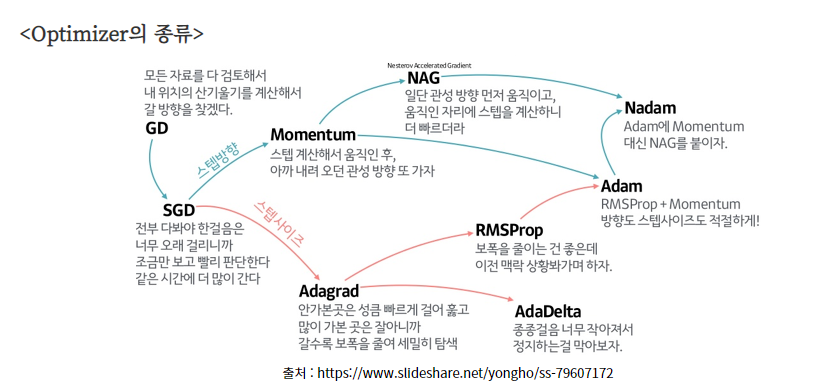

1. Stochastic gradient decent(SGD)

- full-batch가 아닌 mini batch로 학습을 진행하는 것

- (* batch로 학습하는 이유 : full-batch로 epoch마다 weight를 수정하지 않고 빠르게 mini-batch로 weight를 수정하면서 학습하기 위해)


2. Momentum

- SGD에 momentum개념을 추가한 것이다.

- 현재 batch로만 학습하는 것이 아니라 이전의 batch 학습결과도 반영한다.

3. AdaGrad

- 학습을 통해 크게 변동이 있었던 가중치에 대해서는 학습률을 감소시키고 학습을 통해 아직 가중치의 변동이 별로 없었던 가중치는 학습률을 증가시켜서 학습이 되게끔 한다.

4. RMSProp

- AdaGrad는 간단한 convex function에서 잘 동작하지만, 복잡한 다차원 곡면 function에서는 global minimum에 도달하기 전에 학습률이 0에 수렴할 수 있다. 따라서 RMSProp에서는 이를 보완하였다.

5. Adam

- Momentum과 RMSProp를 융합한 방법이다.

Loss function(classification)
--

categorical crossentropy (멀티 클래스 분류에 사용)

$$ L=-\frac{1}{N} \sum_{j=1}^{N} \sum_{i=1}^{C} t_{ij} \log (y_{ij}) $$

sparse categorical crossentropy 

- 라벨이 정수의 형태로 제공될 때 사용

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 192, 256, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 192, 256, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 192, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 96, 128, 32)       0         
_________________________________________________________________
dropout (Dropout)            (None, 96, 128, 32)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 128, 32)       128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 128, 64)       1

In [ ]:
MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10) 

- 이전에 모델 돌리는데, 2시간 가까운 시간이 소요되었으므로, 이번에는 batch_size=10, epochs=5으로 진행 후 비교

In [ ]:
#history=model.fit(x_train, y_train, batch_size=10, epochs=5, validation_data=(x_test,y_test), callbacks=[early_stopping_callback, checkpointer])

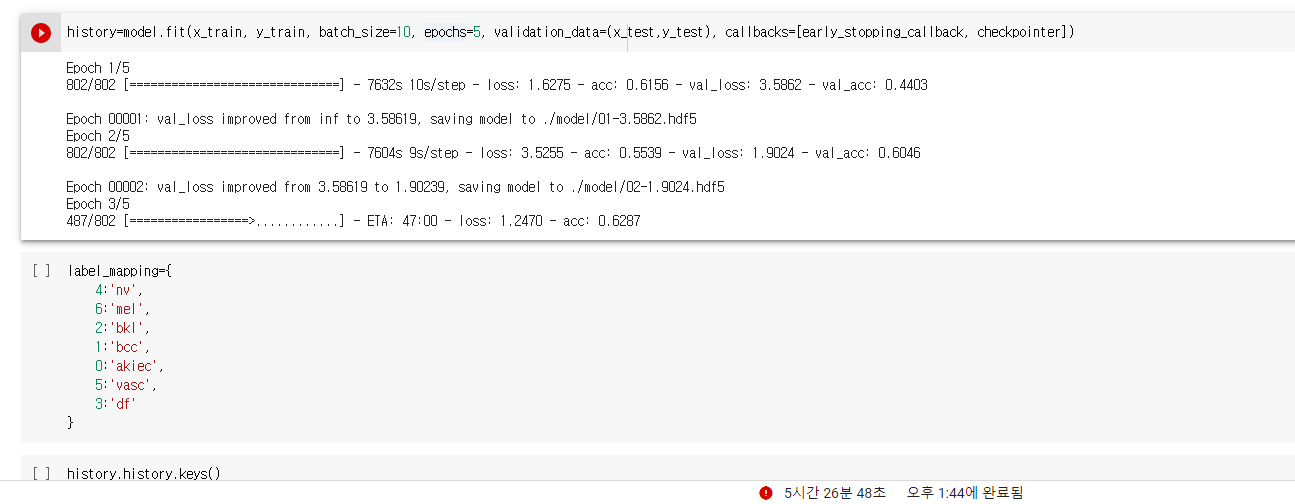

- 5시간 26분 48초 뒤에 끊어짐

시간이 너무 오래걸리고 세션이 자꾸 다운되므로, SkinCancerMNIST 2탄에서는 8$\times$8 RGB, L 파일 혹은 28$\times$28 RGB, L 파일로 딥러닝을 적용해보기로 한다.